In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [41]:
x = [
  [1, 0, 1, 0], # Input 1
  [0, 2, 0, 2], # Input 2
  [1, 1, 1, 1]  # Input 3
 ]
x = torch.tensor(x, dtype=torch.float32)
x.shape

torch.Size([3, 4])

In [39]:
def rms_angular_error(estimated_normals, ground_truth_normals):
    estimated_normals = F.normalize(estimated_normals, dim=1)
    ground_truth_normals = F.normalize(ground_truth_normals, dim=1)

    dot_product = torch.sum(estimated_normals * ground_truth_normals, dim=1)
    dot_product = torch.clamp(dot_product, -1.0, 1.0)
    dot_product = torch.abs(dot_product)
    angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
    squared_diff = angular_diff.pow(2)
    mean_squared_diff = torch.mean(squared_diff)
    rms_angular_error = torch.sqrt(mean_squared_diff)
    return rms_angular_error.item() 

pred_root = '1layer_SA_nosoft/my_experiments/my_experiment/results'
gt_root = '/media/ashish/zoneD/AdaFit/data/pcpnet'
testset = '/media/ashish/zoneD/AdaFit/data/pcpnet/testset_no_noise.txt'

rms_mean = 0
no_noise_rms_list = []
lil_noise_rms_list = []
med_noise_rms = []
shapes = []
#read files in pred_root
import os
from natsort import natsorted

with open(testset, 'r') as f: 
    file_content = f.read()
    words = file_content.split()
    shapes.extend(words)


for ind,shp in enumerate(shapes):
        #check if file exists
        if (os.path.exists(os.path.join(pred_root, shp+'.normals')) and os.path.exists(os.path.join(gt_root, shp+'.normals'))):
            pred = np.loadtxt(os.path.join(pred_root, shp+'.normals'))
            gt = np.loadtxt(os.path.join(gt_root, shp+'.normals'))
            print(os.path.join(pred_root, shp+'.normals'), os.path.join(gt_root, shp+'.normals'))
            no_noise_rms_list.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
        # if ind%3 == 0:
                # print(os.path.join(pred_root, file), os.path.join(gt_root, file))
                # no_noise_rms_list.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
        # elif ind%3 == 1:
        #         lil_noise_rms_list.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
        # else:
        #         med_noise_rms.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
print(np.array(no_noise_rms_list).mean())
        # rms = np.sqrt(np.mean((pred - gt)**2))
        # rms_list.append(rms)
        # rms_mean += rms
# for file in os.listdir(pred_root):
#         pred = np.loadtxt(os.path.join(pred_root, file))
#         gt = np.loadtxt(os.path.join(gt_root, file))
#         print(os.path.join(pred_root, file), os.path.join(gt_root, file))
#         break
        # rms = np.sqrt(np.mean((pred - gt)**2))
        # rms_list.append(rms)
        # rms_mean += rms

1layer_SA_nosoft/my_experiments/my_experiment/results/galera100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/galera100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/icosahedron100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/icosahedron100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/netsuke100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/netsuke100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/Cup34100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/Cup34100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/sphere100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/sphere100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/cylinder100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/cylinder100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/star_smooth100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/star_smooth100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/star_

In [40]:
ind

18

In [36]:
def rms_angular_error(estimated_normals, ground_truth_normals):
    estimated_normals = F.normalize(estimated_normals, dim=1)
    ground_truth_normals = F.normalize(ground_truth_normals, dim=1)

    dot_product = torch.sum(estimated_normals * ground_truth_normals, dim=1)
    dot_product = torch.clamp(dot_product, -1.0, 1.0)
    dot_product = torch.abs(dot_product)
    angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
    squared_diff = angular_diff.pow(2)
    mean_squared_diff = torch.mean(squared_diff)
    rms_angular_error = torch.sqrt(mean_squared_diff)
    return rms_angular_error.item() 

pred_root = '1layer_SA_nosoft/my_experiments/my_experiment/results'
gt_root = '/media/ashish/zoneD/AdaFit/data/pcpnet'

rms_mean = 0
no_noise_rms_list = []
lil_noise_rms_list = []
med_noise_rms = []
#read files in pred_root
import os
from natsort import natsorted

for ind,file in enumerate(natsorted(os.listdir(pred_root))):
        pred = np.loadtxt(os.path.join(pred_root, file))
        gt = np.loadtxt(os.path.join(gt_root, file))
        # print(os.path.join(pred_root, file), os.path.join(gt_root, file))
        if ind%3 == 0:
                print(os.path.join(pred_root, file), os.path.join(gt_root, file))
                no_noise_rms_list.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
        # elif ind%3 == 1:
        #         lil_noise_rms_list.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
        # else:
        #         med_noise_rms.append(rms_angular_error(torch.tensor(pred), torch.tensor(gt)))
print(np.array(no_noise_rms_list).mean())
print(ind)
        # rms = np.sqrt(np.mean((pred - gt)**2))
        # rms_list.append(rms)
        # rms_mean += rms
# for file in os.listdir(pred_root):
#         pred = np.loadtxt(os.path.join(pred_root, file))
#         gt = np.loadtxt(os.path.join(gt_root, file))
#         print(os.path.join(pred_root, file), os.path.join(gt_root, file))
#         break
        # rms = np.sqrt(np.mean((pred - gt)**2))
        # rms_list.append(rms)
        # rms_mean += rms

1layer_SA_nosoft/my_experiments/my_experiment/results/Boxy_smooth100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/Boxy_smooth100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/Liberty100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/Liberty100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/boxunion2100k_noise_white_1.00e-02.normals /media/ashish/zoneD/AdaFit/data/pcpnet/boxunion2100k_noise_white_1.00e-02.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/cylinder100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/cylinder100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/galera100k.normals /media/ashish/zoneD/AdaFit/data/pcpnet/galera100k.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/icosahedron100k_noise_white_1.00e-02.normals /media/ashish/zoneD/AdaFit/data/pcpnet/icosahedron100k_noise_white_1.00e-02.normals
1layer_SA_nosoft/my_experiments/my_experiment/results/pipe100k.normals /media/ashish/zoneD/AdaFit/

In [34]:
val_loss = np.load('1layer_SA_nosoft/my_experiments/rms_test_per_ep.npy')

val_loss.min()

5.427765766779582

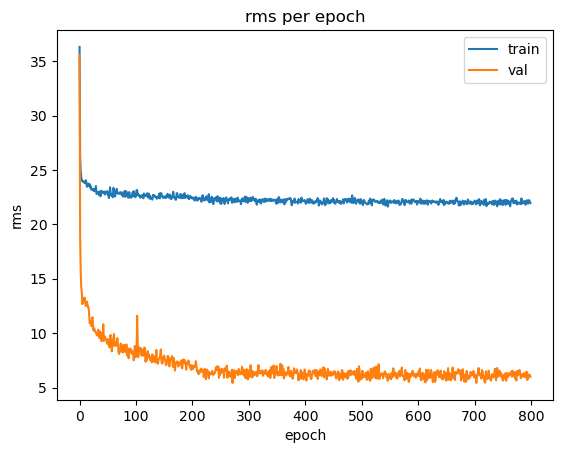

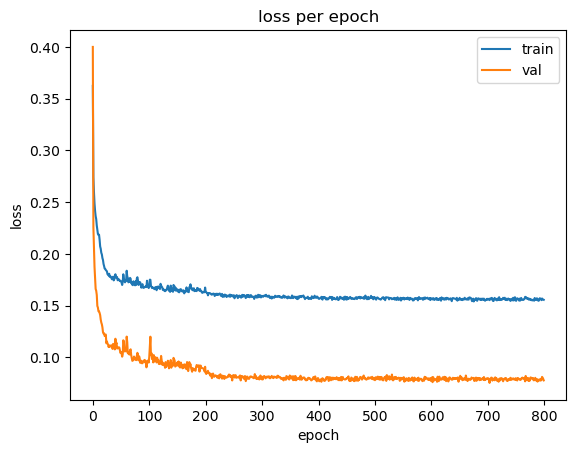

In [33]:
val_loss = np.load('1layer_SA_nosoft/my_experiments/rms_test_per_ep.npy')
tr_loss = np.load('1layer_SA_nosoft/my_experiments/rms_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('rms')
plt.title('rms per epoch')
plt.show()

val_loss = np.load('1layer_SA_nosoft/my_experiments/loss_test_per_ep.npy')
tr_loss = np.load('1layer_SA_nosoft/my_experiments/loss_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')
plt.show()

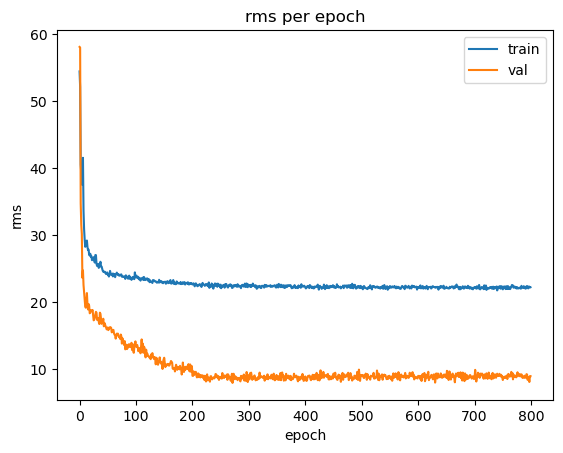

In [28]:
val_loss = np.load('custom_wgt_nosoft/my_experiments/rms_test_per_ep.npy')
tr_loss = np.load('custom_wgt_nosoft/my_experiments/rms_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('rms')
plt.title('rms per epoch')
plt.show()

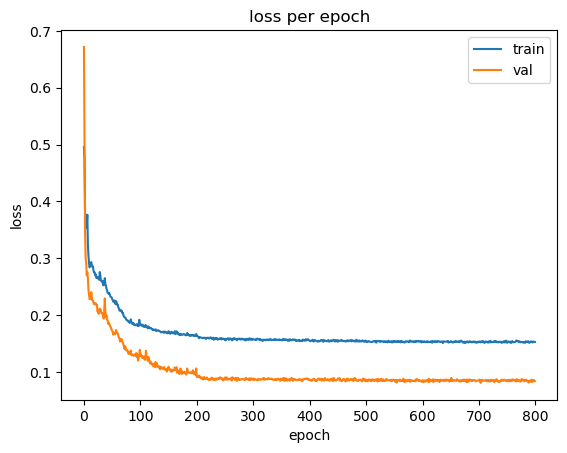

In [29]:
val_loss = np.load('custom_wgt_nosoft/my_experiments/loss_test_per_ep.npy')
tr_loss = np.load('custom_wgt_nosoft/my_experiments/loss_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')
plt.show()

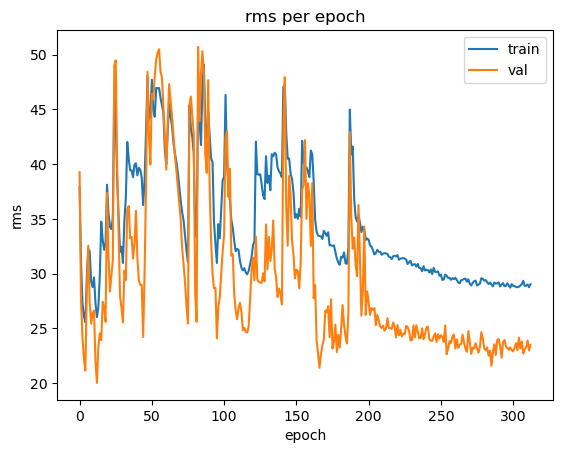

In [25]:
val_loss = np.load('SA_weighted_vande/my_experiments/rms_test_per_ep.npy')
tr_loss = np.load('SA_weighted_vande/my_experiments/rms_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('rms')
plt.title('rms per epoch')
plt.show()

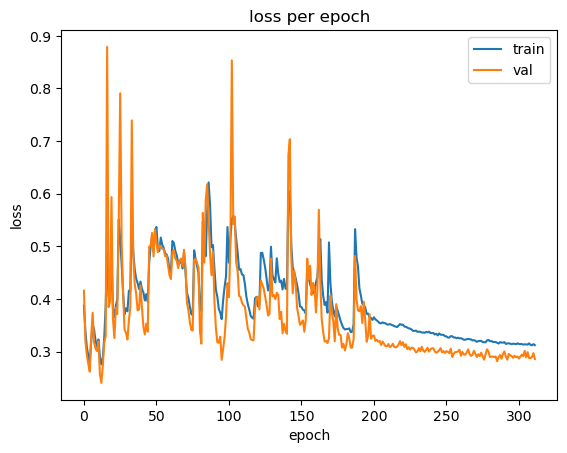

In [24]:
val_loss = np.load('SA_weighted_vande/my_experiments/loss_test_per_ep.npy')
tr_loss = np.load('SA_weighted_vande/my_experiments/loss_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')
plt.show()

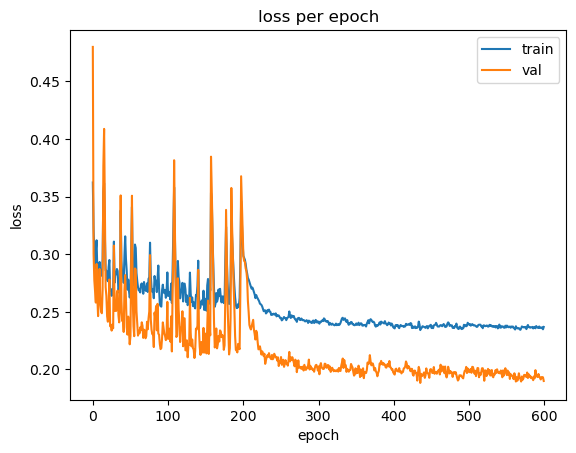

In [23]:
val_loss = np.load('weighted_vande/my_experiments/loss_test_per_ep.npy')
tr_loss = np.load('weighted_vande/my_experiments/loss_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss per epoch')
plt.show()

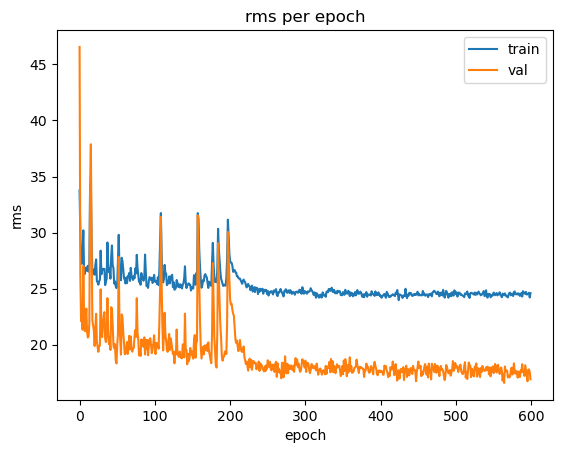

In [22]:
val_loss = np.load('weighted_vande/my_experiments/rms_test_per_ep.npy')
tr_loss = np.load('weighted_vande/my_experiments/rms_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('rms')
plt.title('rms per epoch')
plt.show()

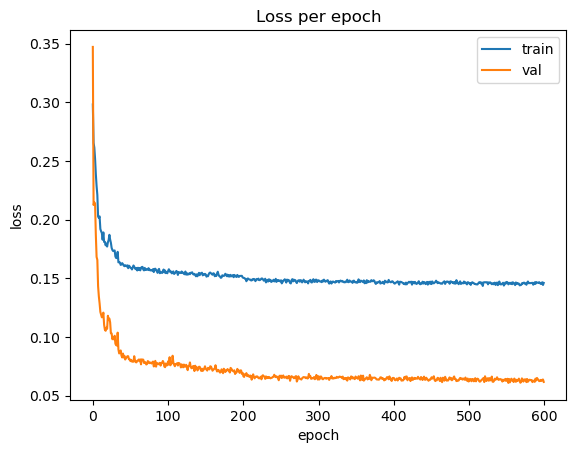

In [19]:
val_loss = np.load('learn_n/my_experiments/loss_test_per_ep.npy')
tr_loss = np.load('learn_n/my_experiments/loss_train_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss per epoch')
plt.show()

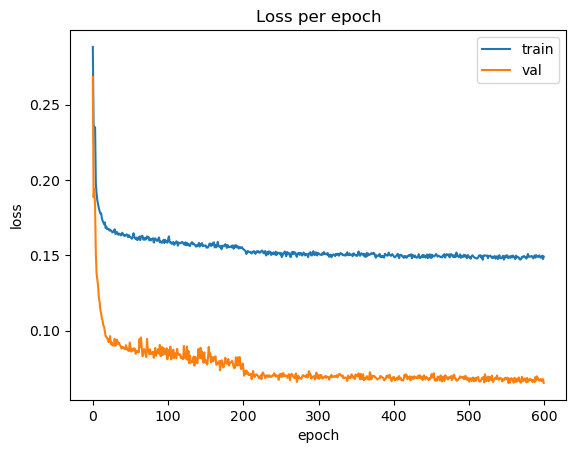

In [3]:
tr_loss = np.load('loss_train_per_ep.npy')
val_loss = np.load('loss_test_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss per epoch')
plt.show()

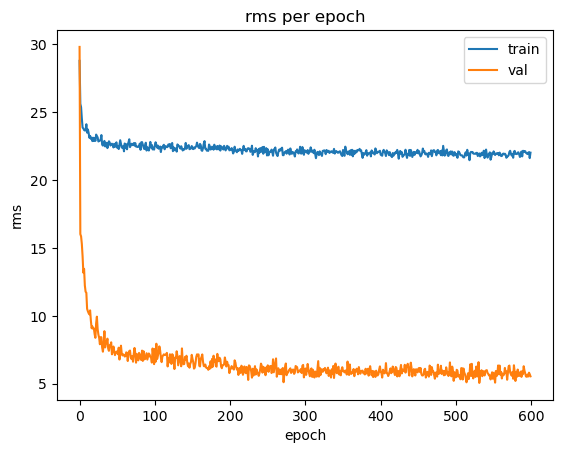

In [10]:
tr_loss = np.load('learn_n/my_experiments/rms_train_per_ep.npy')
val_loss = np.load('learn_n/my_experiments/rms_test_per_ep.npy')

plt.plot(tr_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('rms')
plt.title('rms per epoch')
plt.show()

In [6]:
ori_norm = np.array(np.loadtxt("data/pcpnet/galera100k.normals"))
pred_norm = np.array(np.loadtxt("log_single_scale/my_experiments/my_experiment/results/galera100k.normals"))

In [18]:
def rms_angular_error(estimated_normals, ground_truth_normals):
    estimated_normals = F.normalize(estimated_normals, dim=1)
    ground_truth_normals = F.normalize(ground_truth_normals, dim=1)

    dot_product = torch.sum(estimated_normals * ground_truth_normals, dim=1)
    dot_product = torch.clamp(dot_product, -1.0, 1.0)
    dot_product = torch.abs(dot_product)
    angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
    squared_diff = angular_diff.pow(2)
    mean_squared_diff = torch.mean(squared_diff)
    rms_angular_error = torch.sqrt(mean_squared_diff)
    return rms_angular_error.item() 

rms = rms_angular_error(torch.tensor(pred_norm), torch.tensor(ori_norm))
print(rms)

7.48003091233426


In [17]:
ori_t = torch.tensor(ori_norm)
pred_t = torch.tensor(pred_norm)
dot_product = torch.abs(torch.dot(ori_t[0], pred_t[0]))
print(dot_product.item())
angular_diff = torch.acos(dot_product) * torch.div(180.0, torch.pi)
print(angular_diff.item())

0.9964753987302184
4.811940461571517


In [27]:
t1 = torch.rand(4,128,55)
t2 = torch.rand(4,128,55)
t3 = t1+t2
t3.shape

torch.Size([4, 128, 55])

In [28]:
out = torch.nn.AdaptiveAvgPool1d(1)(t3)
print(out.shape)


torch.Size([4, 128, 1])
